In [22]:
from data_loader import Data_set_body
import torch, utils, pymesh, os
from model.model import EncoderDecoder
import options
import matplotlib.pyplot as plt

option = options.Animals_Option()

exp_time = "30jun_e0"


New MLP decoder : hidden size 512, num_layers 2, activation relu


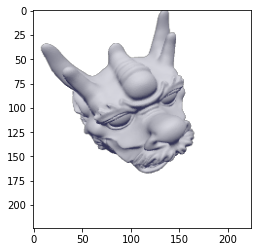

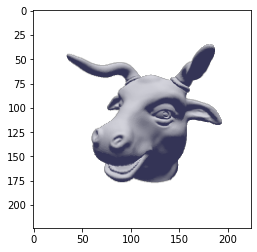

In [23]:
train_Data = Data_set_body(option.number_points, 'overfit', "animals")
if torch.cuda.is_available():
    option.device = torch.device(f"cuda:0")
else:
    option.device = torch.device(f"cpu")

model = EncoderDecoder(option)
model_dict_file = 'runs/model_animals_interp_07-30_21h33m.ckpt'
model.load_state_dict(torch.load(model_dict_file))
ind_0 = 0
ind_1 = -1

id_0 = ind_0 if ind_0>=0 else len(train_Data)+ind_0
input_0 = train_Data[ind_0]['img'].unsqueeze(0).float().to(option.device)
id_1 = ind_1 if ind_1>=0 else len(train_Data)+ind_1
input_1 = train_Data[ind_1]['img'].unsqueeze(0).float().to(option.device)
model.eval()
lat_code_0 = model.encoder(input_0)
lat_code_1 = model.encoder(input_1)
mesh0 = model.generate_mesh(input_0)
mesh1 = model.generate_mesh(input_1)


pic0 = train_Data[ind_0]['img'].numpy().transpose(1,2,0).astype(int)
pic1 = train_Data[ind_1]['img'].numpy().transpose(1,2,0).astype(int)

plt.imshow(pic0)
plt.figure()
plt.imshow(pic1)

if not os.path.exists(f"runs/for_gif/{exp_time}_exp"):
    os.makedirs(f"runs/for_gif/{exp_time}_exp")
num_interpolation = 60
for i in range(num_interpolation):
    latent_new = lat_code_0 + i * (lat_code_1 - lat_code_0) / num_interpolation
    mesh_new = model.generate_mesh_by_latent(latent_new)
    pymesh.save_mesh(f"runs/for_gif/{exp_time}_exp/mesh_human_head_{i}.obj", mesh_new, ascii=True)

In [25]:
mesh_folder = f"runs/for_gif/{exp_time}_exp"

utils.meshes_to_gif(mesh_folder, f"runs/for_gif/{exp_time}_animals_dragon2cow.gif", 10)

visualizing: 100%|██████████| 60/60 [00:23<00:00,  2.51it/s]
